In [18]:
from mlband.imports import *
from mlband.data import *
from mlband.model import *
from mlband.config import *


In [19]:
cifpath = Path('data/mp/')
dataset = CIFData(cifpath, radius=15)
train_loader, val_loader, test_loader = get_train_val_test_loader(
    dataset=dataset,
    collate_fn=collate_pool,
    batch_size=args.batch_size,
    train_ratio=args.train_ratio,
    num_workers=args.workers,
    val_ratio=args.val_ratio,
    test_ratio=args.test_ratio,
    pin_memory=args.cuda,
    train_size=args.train_size,
    val_size=args.val_size,
    test_size=args.test_size,
    return_test=True)

In [39]:
train_loader

TypeError: 'DataLoader' object is not subscriptable

In [3]:
sample_data_list = [dataset[i] for i in
                    random.sample(range(len(dataset)), min(500, len(dataset)))]

/Users/ali/GitHub/rewotes/adavaria/mlband/cgcnn/cgcnn/data.py:335: UserWarning: mp-1207373 not find enough neighbors to build graph. If it happens frequently, consider increase radius.
  warnings.warn('{} not find enough neighbors to build graph. '


In [4]:
from mlband.model import Normalizer

In [29]:
_, sample_target, _ = collate_pool(sample_data_list)
normalizer = Normalizer(sample_target)

In [20]:
structures, _, _ = dataset[0]
orig_atom_fea_len = structures[0].shape[-1]
nbr_fea_len = structures[1].shape[-1]
model = CrystalGraphConvNet(orig_atom_fea_len, nbr_fea_len,
                            atom_fea_len=args.atom_fea_len,
                            n_conv=args.n_conv,
                            h_fea_len=args.h_fea_len,
                            n_h=args.n_h,
                            classification=True if args.task ==
                                                    'classification' else False)

In [7]:
orig_atom_fea_len, nbr_fea_len

(92, 76)

In [21]:
model

CrystalGraphConvNet(
  (embedding): Linear(in_features=92, out_features=64, bias=True)
  (convs): ModuleList(
    (0-2): 3 x ConvLayer(
      (fc_full): Linear(in_features=204, out_features=128, bias=True)
      (sigmoid): Sigmoid()
      (softplus1): Softplus(beta=1, threshold=20)
      (bn1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (bn2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (softplus2): Softplus(beta=1, threshold=20)
    )
  )
  (conv_to_fc): Linear(in_features=64, out_features=128, bias=True)
  (conv_to_fc_softplus): Softplus(beta=1, threshold=20)
  (fc_out): Linear(in_features=128, out_features=1, bias=True)
)

In [9]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn import metrics
from torch.autograd import Variable
from torch.optim.lr_scheduler import MultiStepLR


In [22]:
criterion = nn.MSELoss()

In [23]:
optimizer = optim.Adam(model.parameters(), args.lr,
                               weight_decay=0)

In [24]:
scheduler = MultiStepLR(optimizer, milestones=args.lr_milestones,
                        gamma=0.1)

In [25]:
from mlband.cgcnn.main import train, validate

In [26]:
args.task = 'regression'

In [27]:
# global args

In [28]:
for epoch in range(args.start_epoch, args.epochs):
    # train for one epoch
    train(train_loader, model, criterion, optimizer, epoch, normalizer, args)

    # evaluate on validation set
    mae_error = validate(val_loader, model, criterion, normalizer, args=args)

    if mae_error != mae_error:
        print('Exit due to NaN')
        sys.exit(1)

    scheduler.step()

Epoch: [0][0/250]	Time 6.359 (6.359)	Data 6.115 (6.115)	Loss 3.1516 (3.1516)	MAE 2.004 (2.004)


/Users/ali/GitHub/rewotes/adavaria/mlband/cgcnn/cgcnn/data.py:335: UserWarning: mp-1247813 not find enough neighbors to build graph. If it happens frequently, consider increase radius.
  warnings.warn('{} not find enough neighbors to build graph. '
/Users/ali/GitHub/rewotes/adavaria/mlband/cgcnn/cgcnn/data.py:335: UserWarning: mp-1206865 not find enough neighbors to build graph. If it happens frequently, consider increase radius.
  warnings.warn('{} not find enough neighbors to build graph. '


Epoch: [0][10/250]	Time 6.211 (6.001)	Data 5.732 (5.720)	Loss 1.6259 (3.4618)	MAE 1.316 (1.915)
Epoch: [0][20/250]	Time 5.056 (6.125)	Data 4.883 (5.799)	Loss 0.8806 (2.2400)	MAE 1.144 (1.538)
Epoch: [0][30/250]	Time 8.300 (6.272)	Data 8.024 (5.964)	Loss 1.1584 (1.8443)	MAE 1.317 (1.436)
Epoch: [0][40/250]	Time 6.556 (6.397)	Data 6.300 (6.055)	Loss 0.7089 (1.6246)	MAE 1.106 (1.384)
Epoch: [0][50/250]	Time 5.762 (6.270)	Data 5.427 (5.924)	Loss 0.7325 (1.4633)	MAE 1.068 (1.335)
Epoch: [0][60/250]	Time 6.793 (6.313)	Data 6.447 (5.948)	Loss 0.8536 (1.3487)	MAE 0.986 (1.285)


/Users/ali/GitHub/rewotes/adavaria/mlband/cgcnn/cgcnn/data.py:335: UserWarning: mp-1207373 not find enough neighbors to build graph. If it happens frequently, consider increase radius.
  warnings.warn('{} not find enough neighbors to build graph. '


Epoch: [0][70/250]	Time 7.508 (6.379)	Data 7.227 (6.032)	Loss 0.6361 (1.2551)	MAE 0.882 (1.235)
Epoch: [0][80/250]	Time 6.962 (6.409)	Data 6.654 (6.063)	Loss 0.6583 (1.1780)	MAE 0.910 (1.190)
Epoch: [0][90/250]	Time 7.339 (6.433)	Data 6.754 (6.088)	Loss 0.8484 (1.1151)	MAE 0.872 (1.147)
Epoch: [0][100/250]	Time 6.425 (6.466)	Data 6.105 (6.116)	Loss 0.7974 (1.0631)	MAE 0.932 (1.115)
Epoch: [0][110/250]	Time 6.270 (6.444)	Data 6.094 (6.106)	Loss 0.6904 (1.0264)	MAE 0.855 (1.091)
Epoch: [0][120/250]	Time 5.526 (6.404)	Data 5.337 (6.077)	Loss 0.6540 (0.9979)	MAE 0.793 (1.071)
Epoch: [0][130/250]	Time 5.649 (6.442)	Data 5.486 (6.123)	Loss 0.4467 (0.9667)	MAE 0.676 (1.051)
Epoch: [0][140/250]	Time 7.240 (6.444)	Data 6.991 (6.131)	Loss 0.4482 (0.9436)	MAE 0.712 (1.034)
Epoch: [0][150/250]	Time 6.191 (6.475)	Data 6.030 (6.165)	Loss 0.3092 (0.9156)	MAE 0.616 (1.016)
Epoch: [0][160/250]	Time 6.811 (6.465)	Data 6.630 (6.162)	Loss 0.5103 (0.8961)	MAE 0.710 (1.003)


/Users/ali/GitHub/rewotes/adavaria/mlband/cgcnn/cgcnn/data.py:335: UserWarning: mp-1206872 not find enough neighbors to build graph. If it happens frequently, consider increase radius.
  warnings.warn('{} not find enough neighbors to build graph. '


Epoch: [0][170/250]	Time 8.615 (6.461)	Data 8.315 (6.162)	Loss 0.4953 (0.8796)	MAE 0.798 (0.992)


/Users/ali/GitHub/rewotes/adavaria/mlband/cgcnn/cgcnn/data.py:335: UserWarning: mp-1206385 not find enough neighbors to build graph. If it happens frequently, consider increase radius.
  warnings.warn('{} not find enough neighbors to build graph. '


Epoch: [0][180/250]	Time 5.112 (6.449)	Data 4.852 (6.156)	Loss 0.8834 (0.8642)	MAE 0.930 (0.982)
Epoch: [0][190/250]	Time 4.985 (6.419)	Data 4.833 (6.132)	Loss 0.3332 (0.8476)	MAE 0.588 (0.970)
Epoch: [0][200/250]	Time 5.713 (6.421)	Data 5.551 (6.137)	Loss 0.5945 (0.8381)	MAE 0.842 (0.965)
Epoch: [0][210/250]	Time 6.145 (6.444)	Data 5.952 (6.160)	Loss 0.6661 (0.8306)	MAE 0.858 (0.960)
Epoch: [0][220/250]	Time 7.210 (6.457)	Data 6.692 (6.162)	Loss 0.3711 (0.8165)	MAE 0.644 (0.951)
Epoch: [0][230/250]	Time 8.025 (6.473)	Data 7.815 (6.180)	Loss 0.4904 (0.8079)	MAE 0.759 (0.943)
Epoch: [0][240/250]	Time 7.946 (6.477)	Data 7.696 (6.182)	Loss 0.4545 (0.8002)	MAE 0.771 (0.938)
Test: [0/32]	Time 6.001 (6.001)	Loss 0.6435 (0.6435)	MAE 0.792 (0.792)
Test: [10/32]	Time 6.117 (6.588)	Loss 0.5250 (0.6395)	MAE 0.740 (0.807)


/Users/ali/GitHub/rewotes/adavaria/mlband/cgcnn/cgcnn/data.py:335: UserWarning: mp-1172894 not find enough neighbors to build graph. If it happens frequently, consider increase radius.
  warnings.warn('{} not find enough neighbors to build graph. '


Test: [20/32]	Time 7.227 (6.437)	Loss 0.8762 (0.6320)	MAE 0.889 (0.796)
Test: [30/32]	Time 5.374 (6.314)	Loss 0.8253 (0.6205)	MAE 0.901 (0.788)
 * MAE 0.788
Epoch: [1][0/250]	Time 0.505 (0.505)	Data 0.266 (0.266)	Loss 0.7756 (0.7756)	MAE 0.922 (0.922)
Epoch: [1][10/250]	Time 0.165 (0.211)	Data 0.004 (0.027)	Loss 0.5871 (0.7055)	MAE 0.801 (0.841)
Epoch: [1][20/250]	Time 0.153 (0.192)	Data 0.003 (0.016)	Loss 0.3808 (0.6305)	MAE 0.648 (0.824)
Epoch: [1][30/250]	Time 0.170 (0.204)	Data 0.003 (0.012)	Loss 0.6757 (0.6190)	MAE 0.824 (0.814)
Epoch: [1][40/250]	Time 0.195 (0.200)	Data 0.009 (0.010)	Loss 0.7015 (0.6060)	MAE 0.803 (0.799)
Epoch: [1][50/250]	Time 0.215 (0.205)	Data 0.003 (0.009)	Loss 0.8812 (0.5921)	MAE 0.876 (0.788)
Epoch: [1][60/250]	Time 0.142 (0.205)	Data 0.003 (0.008)	Loss 0.4088 (0.5879)	MAE 0.646 (0.784)
Epoch: [1][70/250]	Time 0.128 (0.204)	Data 0.003 (0.007)	Loss 0.4678 (0.5761)	MAE 0.741 (0.776)
Epoch: [1][80/250]	Time 0.153 (0.204)	Data 0.003 (0.007)	Loss 0.4863 (0.5671

In [34]:
validate(test_loader, model, criterion, normalizer, test=True, args=args)

Test: [0/32]	Time 0.250 (0.250)	Loss 0.3733 (0.3733)	MAE 0.642 (0.642)
Test: [10/32]	Time 0.092 (0.114)	Loss 0.2629 (0.3256)	MAE 0.577 (0.590)
Test: [20/32]	Time 0.055 (0.097)	Loss 0.4495 (0.3596)	MAE 0.675 (0.608)
Test: [30/32]	Time 0.073 (0.089)	Loss 0.2657 (0.3373)	MAE 0.526 (0.591)
 ** MAE 0.591


tensor(0.5913)

In [31]:
# the csv file doesn't have the header row and index column. I want to call the cols id target and predicted
df = pd.read_csv('test_results.csv', header=None, index_col=None)
df.columns = ['id', 'target', 'predicted']
df

,id,target,predicted
0,mp-1210308,3.1435,2.485267
1,mp-675353,0.0000,0.293677
2,mp-1227301,0.0000,0.203731
3,mp-1018703,0.0000,0.175868
4,mp-1200375,0.0000,0.525511
...,...,...,...
1994,mp-1095610,0.0882,0.172271
1995,mp-773900,3.6368,3.687782
1996,mp-1881105,0.0000,0.408073
1997,mp-1017063,0.0000,0.258626


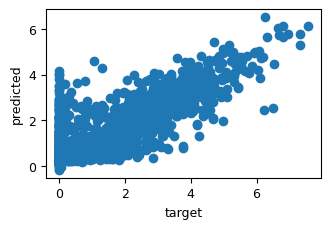

0.5913271722007005

In [32]:
# Plot the predicted vs target values parity plot
import matplotlib.pyplot as plt

plt.scatter(df['target'], df['predicted'])
plt.xlabel('target')
plt.ylabel('predicted')
plt.show()

# pring the mean absolute error
from sklearn.metrics import mean_absolute_error

mean_absolute_error(df['target'], df['predicted'])